<a href="https://colab.research.google.com/github/kimsh519/ms-ai-school/blob/main/keras02_moviereview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
train_data.shape

17464789/17464789 [==============================] - 0s 0us/step


(25000,)

In [2]:
# 데이터 준비
import numpy as np

def vectorize_sequence(sequences, dimension = 10000 ) :     # 적당한 크기의 배열을 만들기
  result = np.zeros((len(sequences),dimension))
  print(result.shape)
  for i, sequence in enumerate(sequences) :   # eunumerate : 열거형
    result[i, sequence] = 1
  return result

In [3]:
# enumerate example  인덱스 값을 포함하여 값을 돌려준다
a = [1,2,3,4]
print(a)
for i, item in enumerate(a) :
  print(i,item)

[1, 2, 3, 4]
0 1
1 2
2 3
3 4


In [4]:
x_train = vectorize_sequence(train_data)  # 문장으로 되어있는 dataset을 0과 1의 배열로 바꾸어준다 (vectorize)
x_test = vectorize_sequence(test_data)

(25000, 10000)
(25000, 10000)


In [5]:
x_train[0]   #0과 1의 배열이 되었다

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
# 라벨 데이터 실수형으로
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu',input_shape = (10000,))) # input layer
model.add(layers.Dense(16, activation = 'relu')) # hidden layer
model.add(layers.Dense(1, activation = 'sigmoid')) # output layer
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy', metrics=['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]  # 데이터를 3개로 쪼갬 (x_val ,x_partial_train, x_test)
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 136ms/step - loss: 0.5452 - accuracy: 0.7754 - val_loss: 0.4170 - val_accuracy: 0.8591
Epoch 2/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3406 - accuracy: 0.8903 - val_loss: 0.3363 - val_accuracy: 0.8692
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2545 - accuracy: 0.9179 - val_loss: 0.2895 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2050 - accuracy: 0.9324 - val_loss: 0.2876 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1684 - accuracy: 0.9459 - val_loss: 0.2764 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1442 - accuracy: 0.9535 - val_loss: 0.2849 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1249 - accuracy: 0.9601 - val_loss: 0.3135 - val_accuracy: 0.8815
Epoch 8/20
3

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

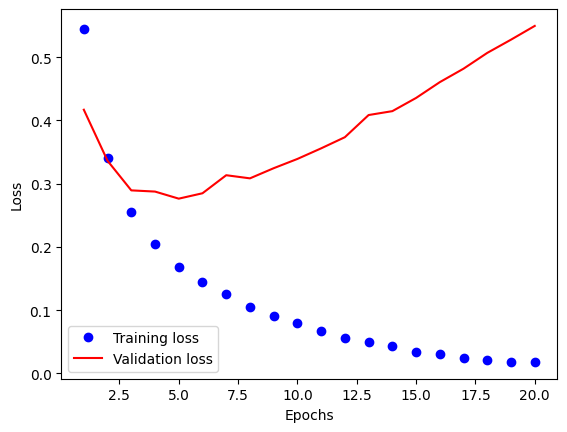

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo',label = 'Training loss')
plt.plot(epochs, val_loss, 'r-', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

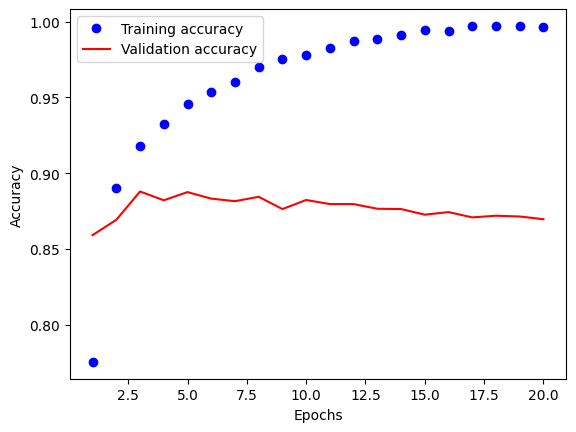

In [13]:
plt.plot(epochs, acc, 'bo',label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r-', label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()            #3번째가 결과가 가장 좋다

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 2s 2ms/step - loss: 0.5953 - accuracy: 0.8596
loss=0.595282793045044, accuracy=0.8596400022506714
